In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-data/covid_data.csv


In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("../input/covid-data/covid_data.csv")

In [18]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


### Determining Dimensions

In [19]:
##determining dimensions
df.shape
df.count

<bound method DataFrame.count of           Date     State          Region  Confirmed  Deaths  Recovered
0    4/29/2020       NaN     Afghanistan       1939      60        252
1    4/29/2020       NaN         Albania        766      30        455
2    4/29/2020       NaN         Algeria       3848     444       1702
3    4/29/2020       NaN         Andorra        743      42        423
4    4/29/2020       NaN          Angola         27       2          7
..         ...       ...             ...        ...     ...        ...
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

[321 rows x 6 columns]>

### finding and showing null values in a plot


In [20]:
##finding and showing null values
df.isnull().sum()


Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

<AxesSubplot:>

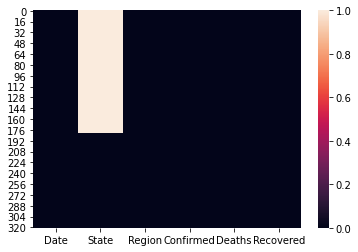

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())

### Region wise details

In [22]:
##Region wise details
df.groupby('Region').sum().head(20)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


### Region wise confirmed cases in descending order

In [23]:
## Region wise confirmed cases in descending order
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(20)



Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

### Region wise confirmed and recovered caes

In [24]:
##Region wise confirmed and recovered caes
df.groupby('Region')['Confirmed','Recovered'].sum().head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
Antigua and Barbuda,24,11
Argentina,4285,1192
Armenia,1932,900
Australia,6752,5715


### updating the data frame and removing those rows which has less than 10 confirmed cases

In [25]:
##updating the data frame and removing those rows which has less than 10 confirmed cases
df = df[~df.Confirmed<10]
df.head(20)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192
7,4/29/2020,NaN,Armenia,1932,30,900
8,4/29/2020,NaN,Austria,15402,580,12779
9,4/29/2020,NaN,Azerbaijan,1766,23,1267


### Finding the region with highest confirmed cases

In [26]:
## Finding the region with highest confirmed cases
df.groupby('Region').Confirmed.sum().sort_values(ascending = False)
df = pd.read_csv("../input/covid-data/covid_data.csv")
df.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

### Finding the regions with lowest deaths

In [27]:
##Finding the regions with lowest deaths
df.groupby('Region').Deaths.sum().sort_values(ascending = True).head(50)

Region
Laos                                0
Mongolia                            0
Mozambique                          0
Cambodia                            0
Fiji                                0
Namibia                             0
Nepal                               0
Madagascar                          0
Macau                               0
Papua New Guinea                    0
Rwanda                              0
Saint Kitts and Nevis               0
Bhutan                              0
Dominica                            0
Central African Republic            0
Saint Lucia                         0
Holy See                            0
Sao Tome and Principe               0
Yemen                               0
Western Sahara                      0
Eritrea                             0
Vietnam                             0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Grenada                             0
South

### Finding details for a particular country

In [28]:
##Finding details for a particular country
df[df.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


### Sorting the dataset by according to confirmed cases


In [29]:
##Sorting the dataset by according to confirmed cases
df.sort_values(by = ['Confirmed'],ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


### Sorting the data set by recovered cases in descending order

In [30]:
##Sorting the data set by recovered cases in descending order
df.sort_values(by = ['Recovered'],ascending=False).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600
